In [1]:
from Data.Population import *
from Data.Functionals import phi
from Models import rect
from Genetic.Operators import *
import matplotlib.pyplot as plt
from time import time


In [3]:
7.2e-5

7.2e-05

In [2]:
#Etapa 00: Definições Iniciais:

xobs = np.linspace(-1000, 1000, 500)
zobs = np.zeros(len(xobs))
model = rect( -100,100,300,900,2 )
model_gz = model.Gz(xobs, zobs)
model_gz_noised = model.addnoise()
xmin, xmax = -1000.0, 1000.0
ymin, ymax = 200, 800.0
min_bounds = [xmin, ymin, 1e5]
max_bounds = [xmax, ymax, 1e10]
nfontes = 20
nind = 5
pmut = 0.1
ngera = int( 1000 )
mu = 1e-2


Geração 0
Geração 1
Geração 2
Geração 3
Geração 4
Geração 5
Geração 6
Geração 7
Geração 8
Geração 9
Geração 10
Geração 11
Geração 12
Geração 13
Geração 14
Geração 15
Geração 16
Geração 17
Geração 18
Geração 19
24.455504975657753
Geração 20
Geração 21
Geração 22
Geração 23
Geração 24
23.776389794306297
Geração 25
Geração 26
Geração 27
Geração 28
Geração 29
Geração 30
Geração 31
Geração 32
Geração 33
Geração 34
Geração 35
23.130015602503526
Geração 36
Geração 37
Geração 38
Geração 39
23.097850953146498
Geração 40
Geração 41
22.606666032267633
Geração 42
Geração 43
Geração 44
Geração 45
Geração 46
Geração 47
20.160887137564398
Geração 48
Geração 49
Geração 50
Geração 51
Geração 52
Geração 53
Geração 54
Geração 55
Geração 56
Geração 57
Geração 58
17.70982171591164
Geração 59
Geração 60
Geração 61
16.37318882506906
Geração 62
Geração 63
Geração 64
Geração 65
Geração 66
Geração 67
Geração 68
Geração 69
Geração 70
Geração 71
Geração 72
Geração 73
Geração 74
Geração 75
Geração 76
Geração 77
Ge

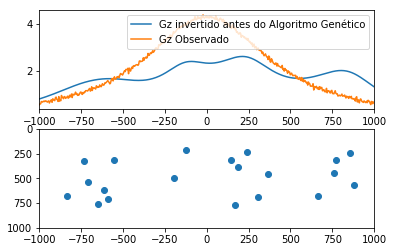

In [3]:

t1 = time( )
guardafit = [ ]
#Etapa 01: Inicialização da População:

pop = Fontes( )
pop.Gera( min_bounds, max_bounds, nfontes, nind )
fontes = pop.asArray( )
gz_fonts = pop.Gz( xobs, zobs )


#Etapa 02: Avaliação da População Inicial:
fit = phi( model_gz_noised, gz_fonts, 'L2', fontes , mu)

iwinner = np.argmin( fit )
best =  fontes[ iwinner ]
melhor = fit[ np.argmin( fit ) ]

plt.figure( )

plt.subplot(211)
plt.plot( xobs, gz_fonts[iwinner] ,label = 'Gz invertido antes do Algoritmo Genético')
plt.plot( xobs, model_gz_noised , label = 'Gz Observado')
plt.legend( )

plt.xlim(-1000,1000)
plt.subplot(212)
plt.scatter( best[:,0], best[:,1] )
plt.xlim( -1000, 1000)
plt.ylim(0,1000)
plt.gca().invert_yaxis()

plt.savefig('Geracao_0.png')
c = 0

for i in range( ngera ):

    c += 1
    print(f'Geração {i}')
    # Etapa 03: Selecao dos pais (roleta viciada)

    pais = operator( 'Roleta', np.array( fit ) )


    # Etapa 04: Definicao da subpopulacao para o cruzamento:

    popcruz = [ ]

    for pai in pais:
        popcruz.append( fontes[ pai ] )


    # Etapa 05: Cruzamento para criacao dos filhos:
    filhos = operator( 'Cruzamento', popcruz )


    # Etapa 06: Aplicacao de mutacao em alguns individuos da populacao de filhos:

    filhos = operator( 'Mutacao', filhos, pmut, min_bounds, max_bounds )
    gz_fonts = pop.Gz( xobs, zobs, pop.Gera_from_Existing( filhos ) )


    # Etapa 07: Calculo das aptidoes dos filhos:

    fit_filhos = phi( model_gz_noised, gz_fonts, 'L2', filhos, mu )


    # Etapa 08: Elitismo para colocar os filhos na populacao original:
    fontes, fit = operator( 'Elitismo', fontes, fit, filhos, fit_filhos )

    guardafit.append( fit[ np.argmin( fit ) ] )
    
    if fit[ np.argmin( fit ) ] < melhor:
        c = 0
        print( fit[np.argmin( fit ) ] )
        melhor = fit[ np.argmin( fit ) ]

    if c >= 10000:
        break



Melhor: 15.289197837969638
Tempo Total 595.9488797187805
[[ 7.89861984e+01  5.53906364e+02  4.92094537e+09]
 [-1.04025941e+01  1.77401729e+02  4.92094537e+09]
 [ 4.58392360e+01  3.86208981e+02  4.92094537e+09]
 [ 1.83118338e+02  3.87133210e+02  4.92094537e+09]
 [ 1.59804548e+01  3.30947563e+02  4.92094537e+09]
 [-3.60430933e+01  2.85252132e+02  4.92094537e+09]
 [-1.37980806e+02  4.82985385e+02  4.92094537e+09]
 [-7.51931426e+00  2.96547352e+02  4.92094537e+09]
 [-1.03696536e+02  3.67783647e+02  4.92094537e+09]
 [-1.55547970e+02  3.82065861e+02  4.92094537e+09]
 [ 6.51192755e+01  2.94472657e+02  4.92094537e+09]
 [ 7.82069317e+01  3.41635953e+02  4.92094537e+09]
 [ 1.51319953e+02  5.11260432e+02  4.92094537e+09]
 [ 4.74670975e+01  4.39519246e+02  4.92094537e+09]
 [ 1.03900890e+02  5.95596206e+02  4.92094537e+09]
 [-3.76546920e+01  3.26873471e+02  4.92094537e+09]
 [ 8.76583425e+01  4.67279256e+02  4.92094537e+09]
 [ 2.88822120e+02  2.39521354e+02  4.92094537e+09]
 [-1.05753925e+02  2.6864

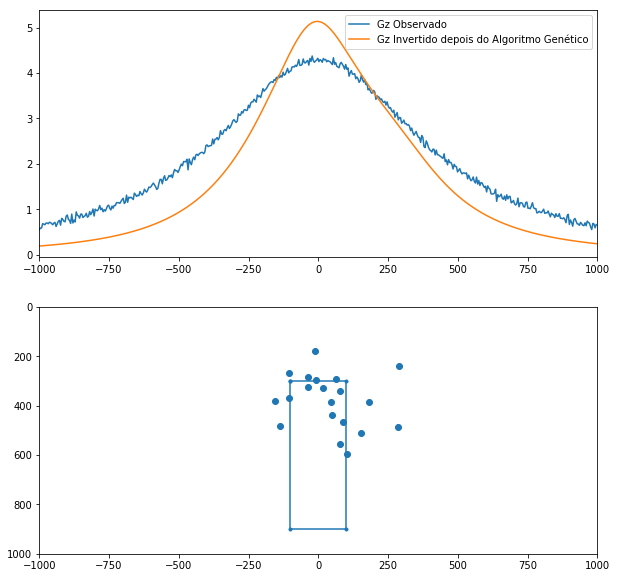

In [5]:
print( f'Melhor: { fit[ np.argmin( fit ) ] }' )
print( f'Tempo Total { time() - t1 }' )
# Etapa 09: convergencia:

iwinner = np.argmin( fit )
best =  fontes[ iwinner ]

b = pop.Gera_from_Existing([best])
print( best )
gz_best = 0
for b in b:
    for i in b:
        gz_best += i.Gz( xobs, zobs)

plt.figure( figsize=(10,10), facecolor='w' )
plt.subplot( 211)
plt.plot( xobs, model_gz_noised ,label = 'Gz Observado')
plt.plot( xobs, gz_best , label = 'Gz Invertido depois do Algoritmo Genético')
plt.legend( )

plt.xlim(-1000,1000)
plt.subplot(212)
plt.scatter( best[:,0], best[:,1] )
plt.plot([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
             [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], ".-")
plt.xlim( -1000, 1000)
plt.ylim(0,1000)
plt.gca().invert_yaxis()

plt.show( )


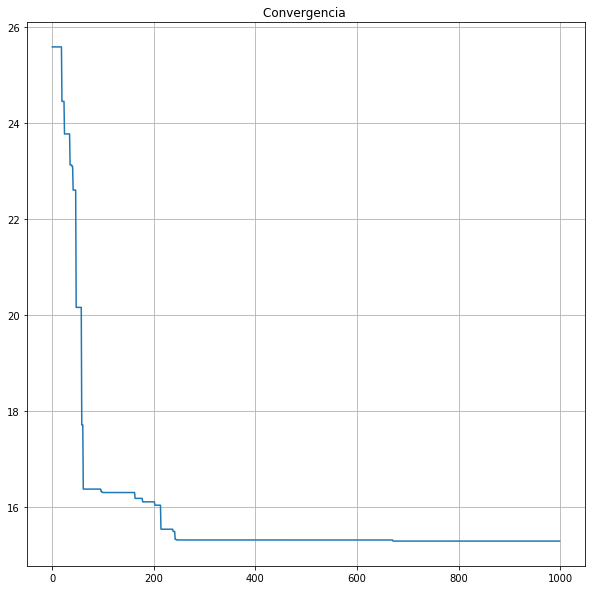

In [6]:
plt.figure( figsize=(10,10), facecolor = 'w' )
plt.title( 'Convergencia ' )
plt.plot( range(ngera), guardafit )
plt.grid( )

plt.show( )